In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

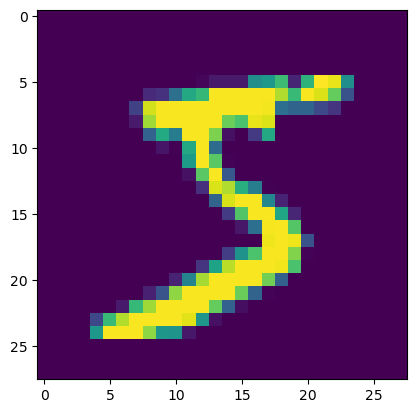

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
# Need to make the y_train into one-hot encoding
y_example = to_categorical(y_train)

In [11]:
y_example.shape

(60000, 10)

In [12]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, 10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255
x_test = x_test/255
# This scales the numbers to values between 0 and 1

In [19]:
scaled_image = x_train[0]

In [20]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

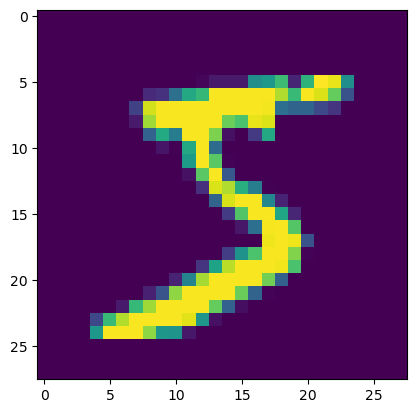

In [21]:
plt.imshow(scaled_image)

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),
                input_shape=(28,28,1),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# OUTPUT LAYER > MULTICLASS SO SOFTMAX ACTIVATION
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [28]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10


1875/1875 [==============================] - 13s 6ms/step - loss: 0.1477 - accuracy: 0.9562 - val_loss: 0.0585 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.0468 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0403 - val_accuracy: 0.9866


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.147708,0.956200,0.058479,0.9812
1,0.049649,0.985200,0.046797,0.9839
2,0.032766,0.989867,0.035278,0.9879
3,0.022657,0.993017,0.040284,0.9866


<Axes: >

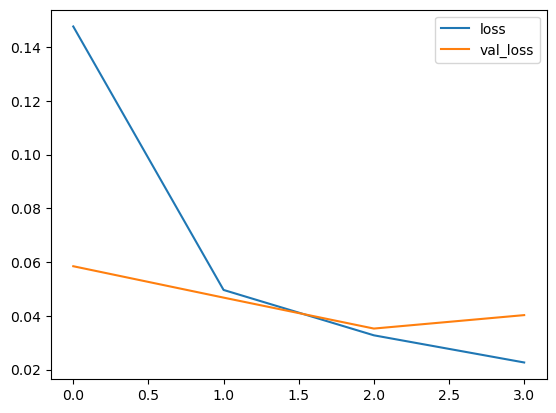

In [31]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

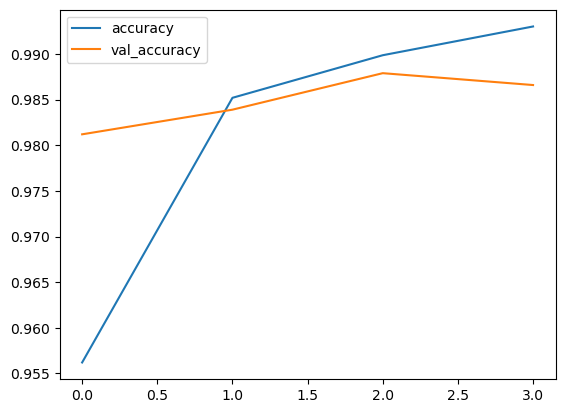

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.04028446972370148, 0.9865999817848206]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
confusion_matrix(y_test, pred)

array([[ 976,    0,    0,    1,    0,    1,    2,    0,    0,    0],
       [   2, 1128,    3,    1,    0,    0,    1,    0,    0,    0],
       [   1,    0, 1021,    2,    1,    0,    1,    4,    2,    0],
       [   0,    0,    2,  998,    0,    9,    0,    0,    1,    0],
       [   2,    0,    0,    0,  951,    0,    1,    0,    1,   27],
       [   1,    0,    0,    3,    0,  887,    1,    0,    0,    0],
       [   5,    2,    1,    0,    1,   12,  937,    0,    0,    0],
       [   0,    1,    6,    2,    0,    1,    0, 1012,    2,    4],
       [   5,    0,    2,    2,    0,    2,    0,    1,  959,    3],
       [   1,    1,    0,    1,    1,    6,    0,    0,    2,  997]],
      dtype=int64)

<Axes: >

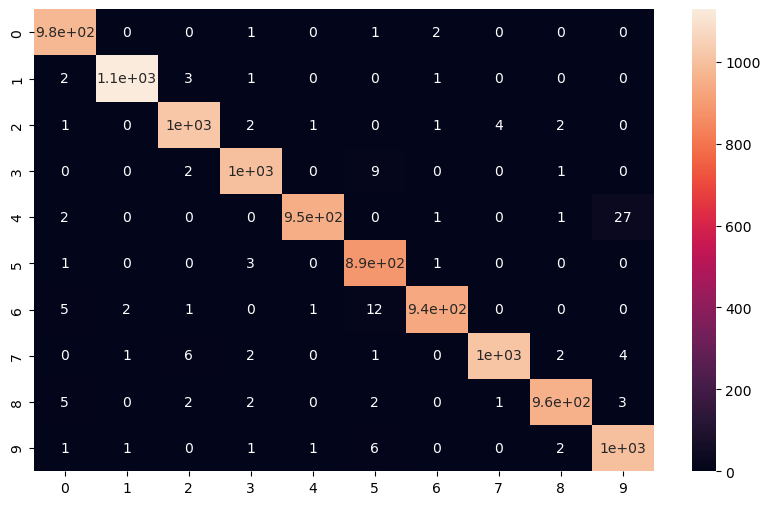

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [39]:
my_num = x_test[0]

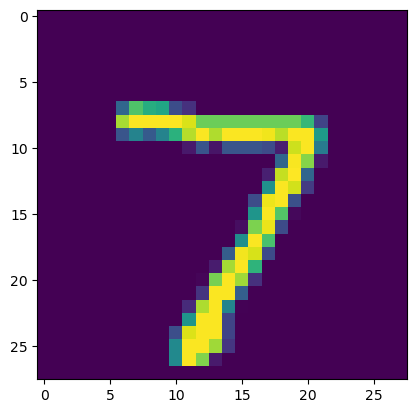

In [42]:
plt.imshow(my_num.reshape(28,28))

In [43]:
from tensorflow.keras.datasets import cifar10

In [44]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [46]:
x_train.shape

(50000, 32, 32, 3)

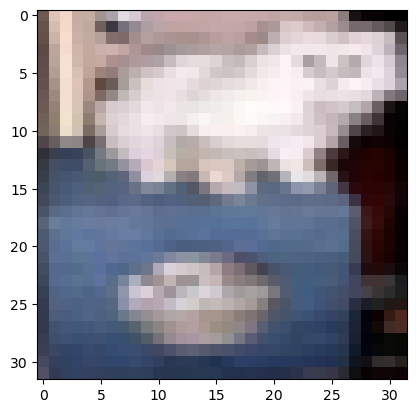

In [48]:
plt.imshow(x_train[38])

In [49]:
x_train[0].max()

255

In [50]:
x_train, x_test = x_train/255 , x_test/255

In [51]:
x_test.shape

(10000, 32, 32, 3)

In [52]:
y_cat_train = to_categorical(y_train, 10)

In [53]:
y_cat_test = to_categorical(y_test, 10)

In [55]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [57]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [58]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 19s 11ms/step - loss: 1.4878 - accuracy: 0.4621 - val_loss: 1.2768 - val_accuracy: 0.5470
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1602 - accuracy: 0.5892 - val_loss: 1.1124 - val_accuracy: 0.6032
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0221 - accuracy: 0.6409 - val_loss: 1.0295 - val_accuracy: 0.6358
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9190 - accuracy: 0.6777 - val_loss: 0.9734 - val_accuracy: 0.6567
Epoch 5/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8327 - accuracy: 0.7081 - val_loss: 0.9990 - val_accuracy: 0.6576
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7520 - accuracy: 0.7364 - val_loss: 0.9480 - val_accuracy: 0.6711
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6793 - accuracy: 0.7620 - val_loss: 0.9658 - val_accurac

In [59]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

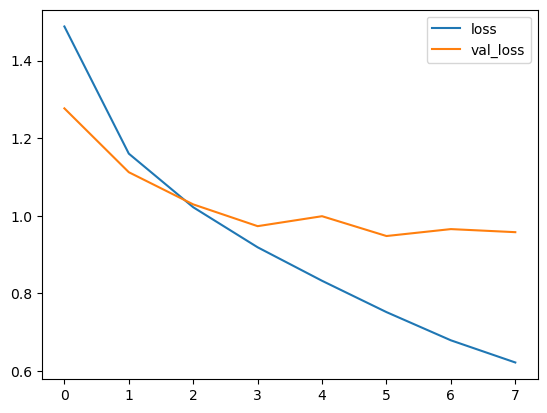

In [61]:
metrics[['loss', 'val_loss']].plot()

In [62]:
pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1000
           1       0.84      0.80      0.82      1000
           2       0.59      0.57      0.58      1000
           3       0.53      0.45      0.49      1000
           4       0.55      0.75      0.64      1000
           5       0.65      0.48      0.55      1000
           6       0.73      0.77      0.75      1000
           7       0.68      0.77      0.72      1000
           8       0.72      0.83      0.77      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [64]:
import os

In [66]:
data_dir = "C:\\Users\\asing\\OneDrive\\Desktop\\Jupyter Notebook\\Udemy\\TF_2_Notebooks_and_Data - Copy\\04-CNNs\\cell_images"

In [67]:
os.listdir(data_dir)

['test', 'train']

In [68]:
from matplotlib.image import imread

In [69]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [71]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [73]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [74]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [75]:
para_cell

'C:\\Users\\asing\\OneDrive\\Desktop\\Jupyter Notebook\\Udemy\\TF_2_Notebooks_and_Data - Copy\\04-CNNs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

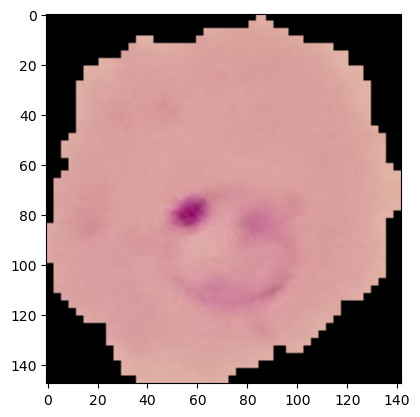

In [78]:
plt.imshow(imread(para_cell))

In [80]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [81]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

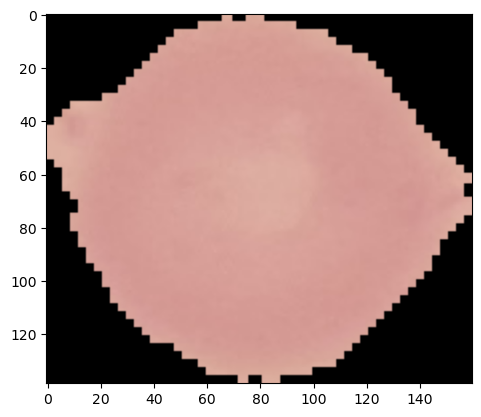

In [82]:
plt.imshow(imread(uninfected_cell))

In [83]:
len(os.listdir(train_path+'parasitized'))

12480

In [84]:
len(os.listdir(train_path+'uninfected'))

12480

In [86]:
len(os.listdir(test_path+'parasitized'))

1300

In [87]:
len(os.listdir(test_path+'uninfected'))

1300

In [88]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [94]:
image_shape = (130, 130, 3)

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

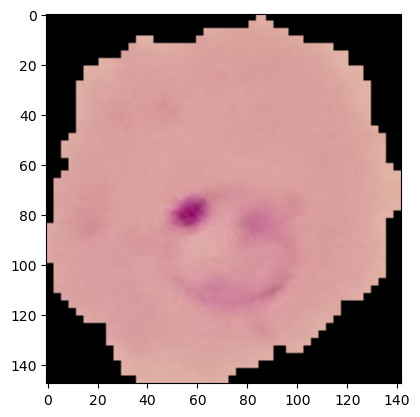

In [102]:
para_img = imread(para_cell)
plt.imshow(imread(para_cell))

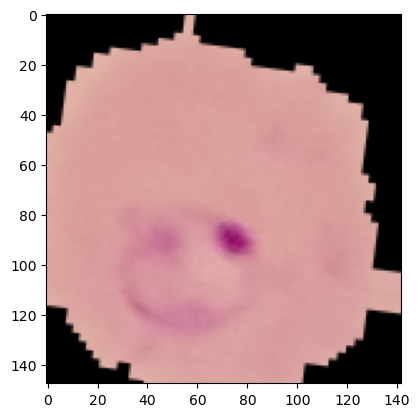

In [104]:
plt.imshow(image_gen.random_transform(para_img))

In [105]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [107]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [108]:
from tensorflow.keras.layers import Dropout

In [110]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [112]:
batch_size=16

In [115]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [116]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [117]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [118]:
# results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])
# Takes too long, will be loading in pretrained model

from tensorflow.keras.models import load_model
model = load_model('malaria_detector.h5')

In [119]:
pred = model.predict_generator(test_image_gen)

C:\Users\asing\AppData\Local\Temp\ipykernel_12712\2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [120]:
pred = pred > 0.5

In [121]:
print(classification_report(test_image_gen.classes, pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.75      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.86      2600
weighted avg       0.89      0.87      0.86      2600



In [123]:
from tensorflow.keras.preprocessing import image

In [124]:
my_image = image.load_img(para_cell, target_size=image_shape)

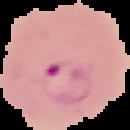

In [125]:
my_image

In [127]:
my_img_arr = image.img_to_array(my_image)

In [128]:
my_img_arr.shape

(130, 130, 3)

In [130]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [132]:
my_img_arr.shape

(1, 130, 130, 3)

In [133]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 103ms/step


array([[0.]], dtype=float32)